In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sp = pd.read_csv('summer-products_2020-08.csv')
sp
sp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [2]:
sp.duplicated().sum()
sp.drop_duplicates(inplace=True)
raw_sp = sp.copy()


In [4]:
sp.isnull().sum()
null = sp.isnull().sum().to_frame(name='nulls').T
dtype = sp.dtypes.to_frame(name='dtypes').T
nunique = sp.nunique().to_frame(name='unique').T
pd.concat([null,dtype,nunique],axis=0)



,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
nulls,0,0,0,0,0,0,0,0,0,43,...,0,0,0,0,1314,0,0,0,0,0
dtypes,object,object,float64,int64,object,int64,int64,float64,int64,float64,...,int64,float64,object,int64,object,object,object,object,object,object
unique,1201,1203,127,104,1,15,2,192,761,605,...,917,952,958,2,125,1341,1341,1341,1,1


In [5]:
round(sp.describe())

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1539.0,1539.0,1539.0,1539.0,1539.0,1539.0,1496.0,1496.0,1496.0,1496.0,...,1539.0,1539.0,1539.0,1539.0,1539.0,1539.0,468.0,1539.0,1539.0,1539.0
mean,8.0,23.0,4422.0,0.0,4.0,907.0,451.0,183.0,137.0,65.0,...,0.0,33.0,2.0,0.0,40.0,50.0,1.0,26772.0,4.0,0.0
std,4.0,30.0,9438.0,0.0,1.0,2002.0,989.0,404.0,314.0,153.0,...,0.0,21.0,1.0,0.0,20.0,3.0,0.0,79191.0,0.0,0.0
min,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,6.0,1.0,1.0,0.0,2.0,0.0
25%,6.0,7.0,100.0,0.0,4.0,26.0,13.0,5.0,4.0,2.0,...,0.0,7.0,2.0,0.0,31.0,50.0,1.0,2052.0,4.0,0.0
50%,8.0,10.0,1000.0,0.0,4.0,161.0,84.0,33.0,26.0,12.0,...,0.0,50.0,2.0,0.0,40.0,50.0,1.0,8197.0,4.0,0.0
75%,11.0,26.0,5000.0,1.0,4.0,873.0,431.0,171.0,134.0,64.0,...,0.0,50.0,3.0,0.0,43.0,50.0,1.0,24564.0,4.0,0.0
max,49.0,252.0,100000.0,1.0,5.0,20744.0,11548.0,4152.0,3658.0,2003.0,...,1.0,50.0,12.0,1.0,140.0,50.0,1.0,2174765.0,5.0,1.0


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canva

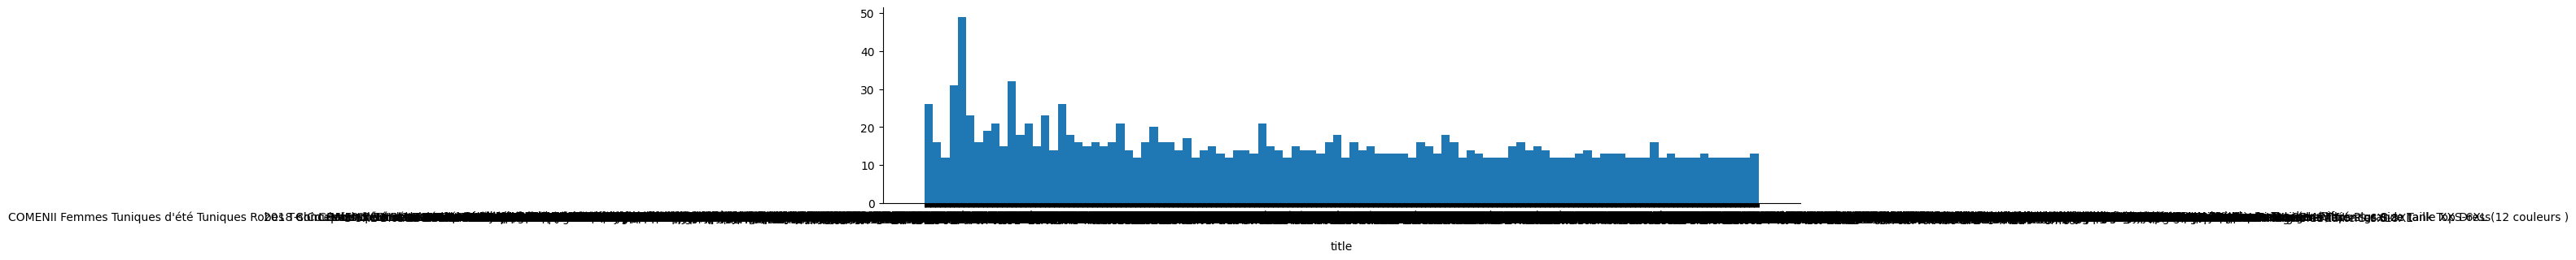

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canva

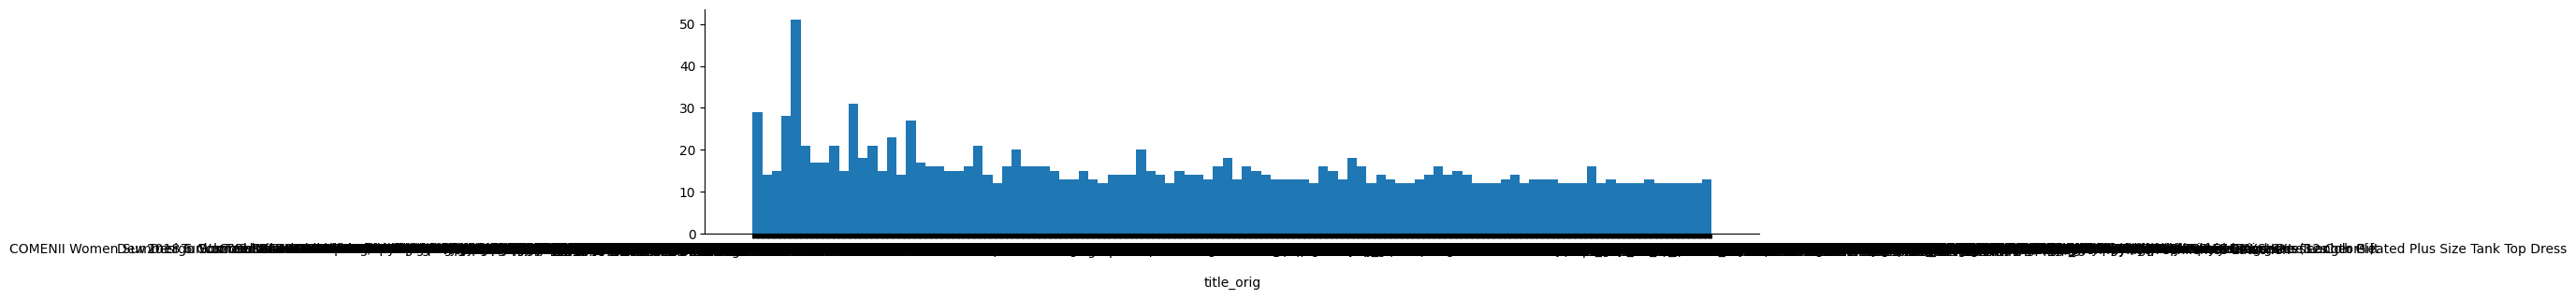

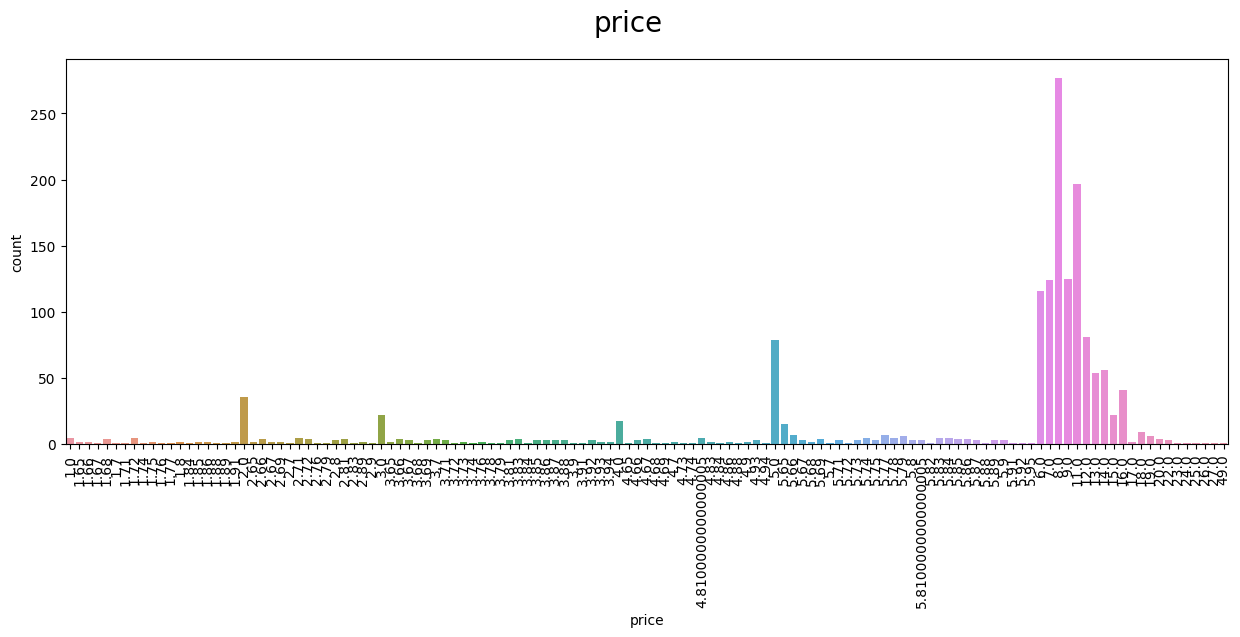

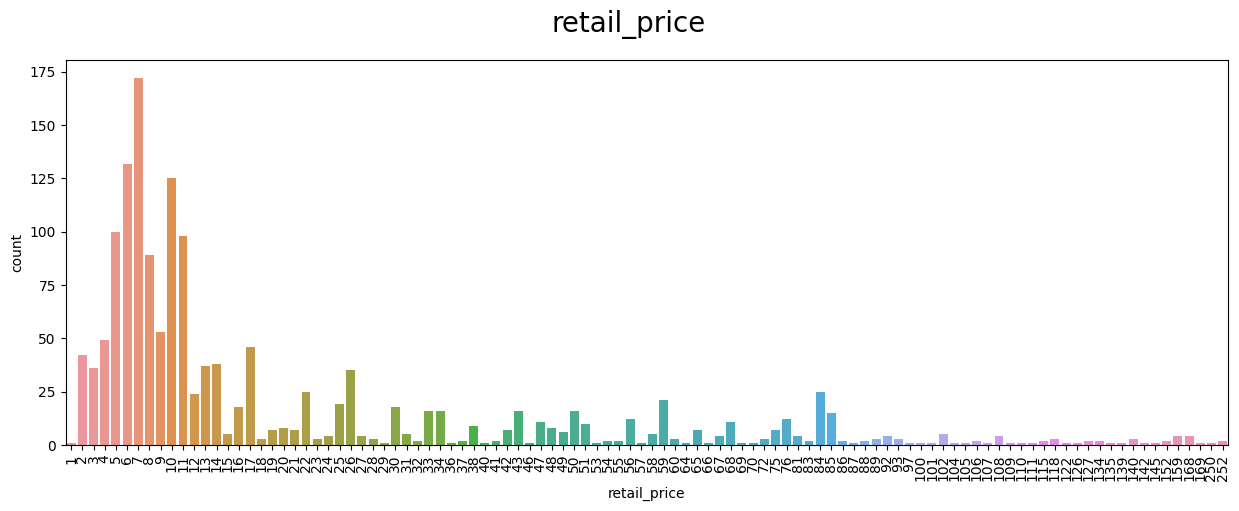

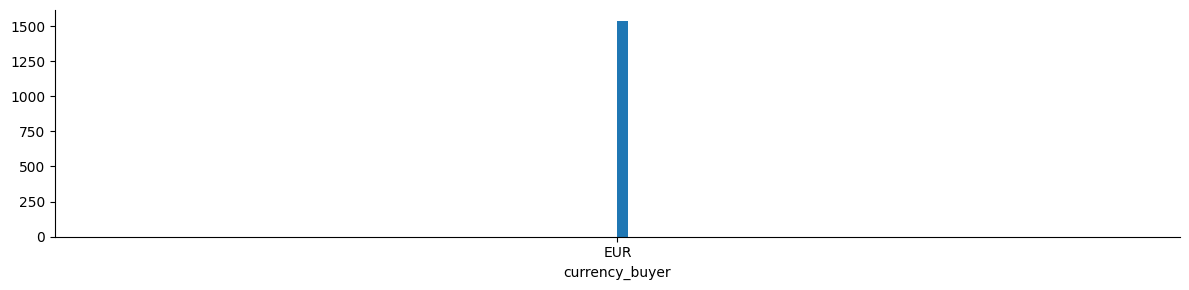

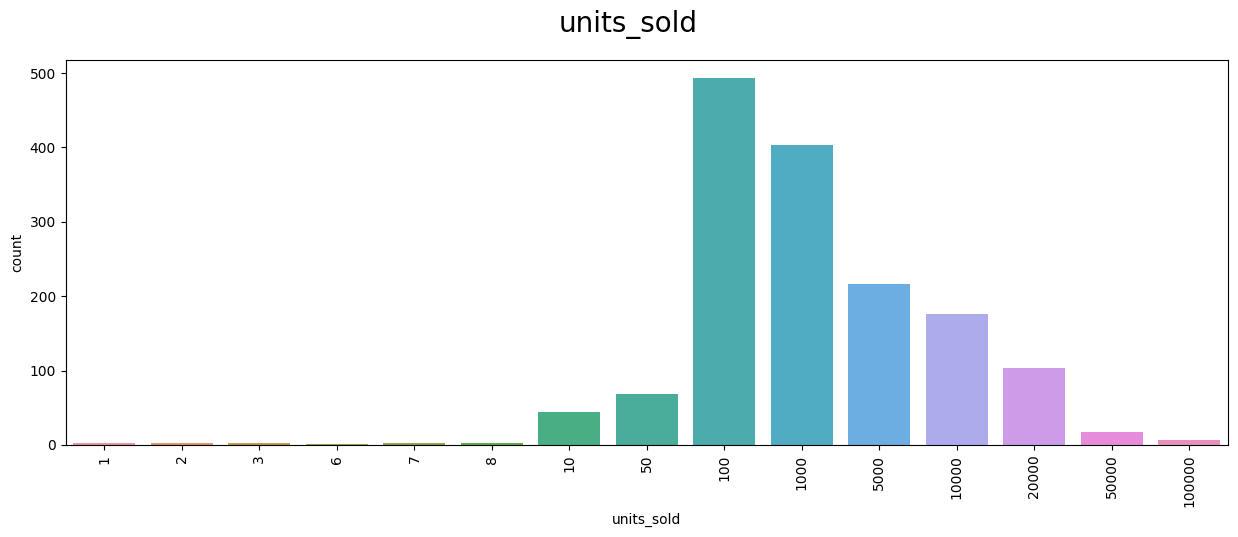

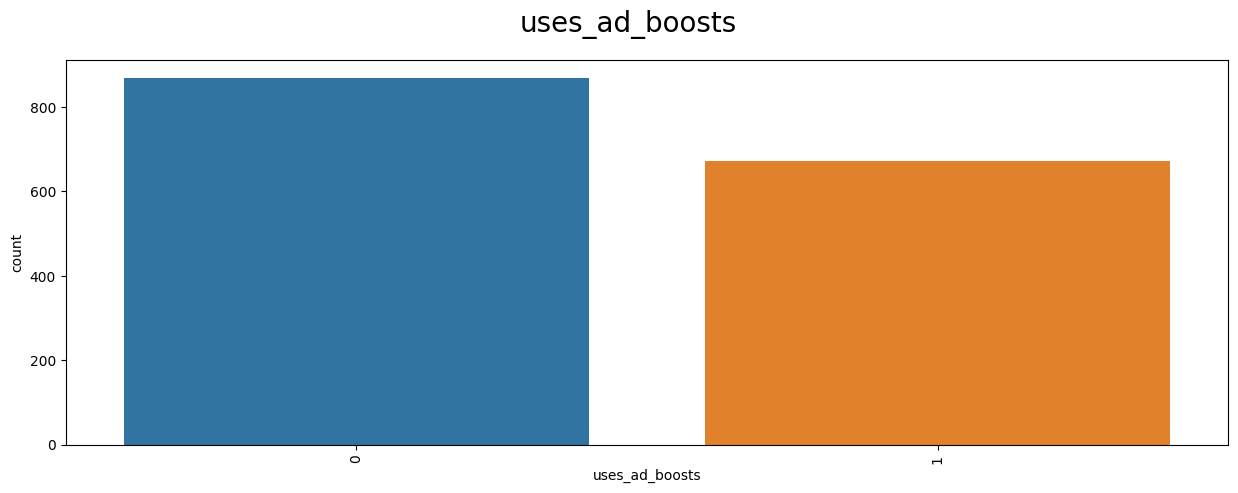

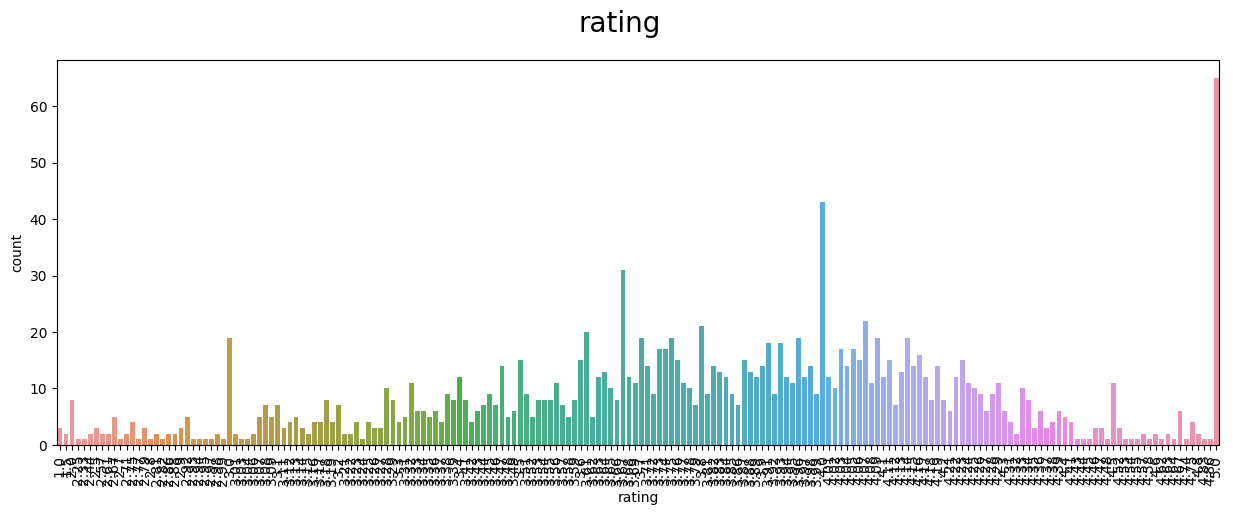

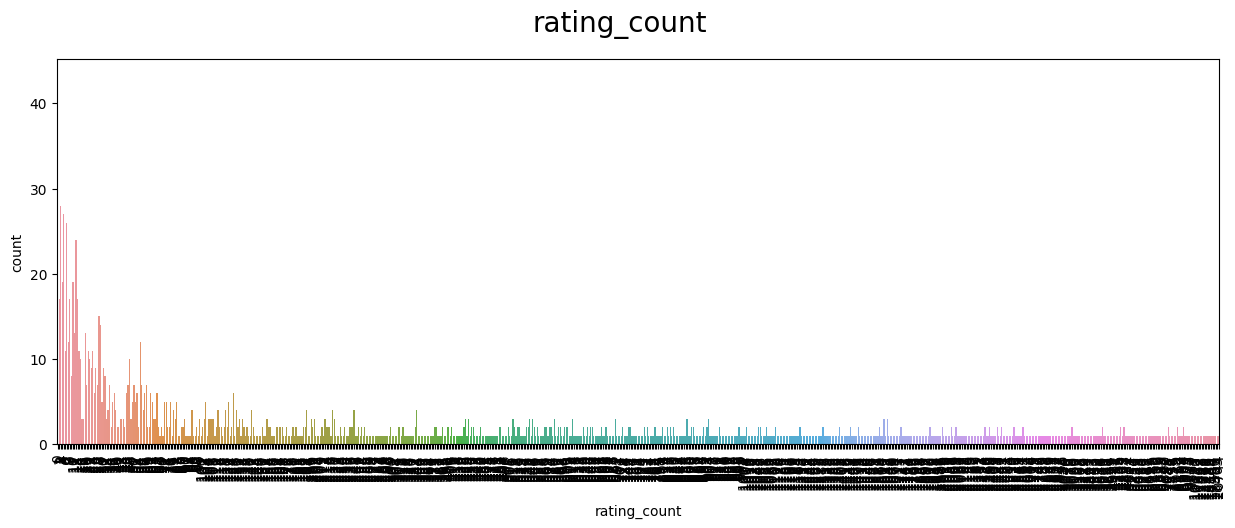

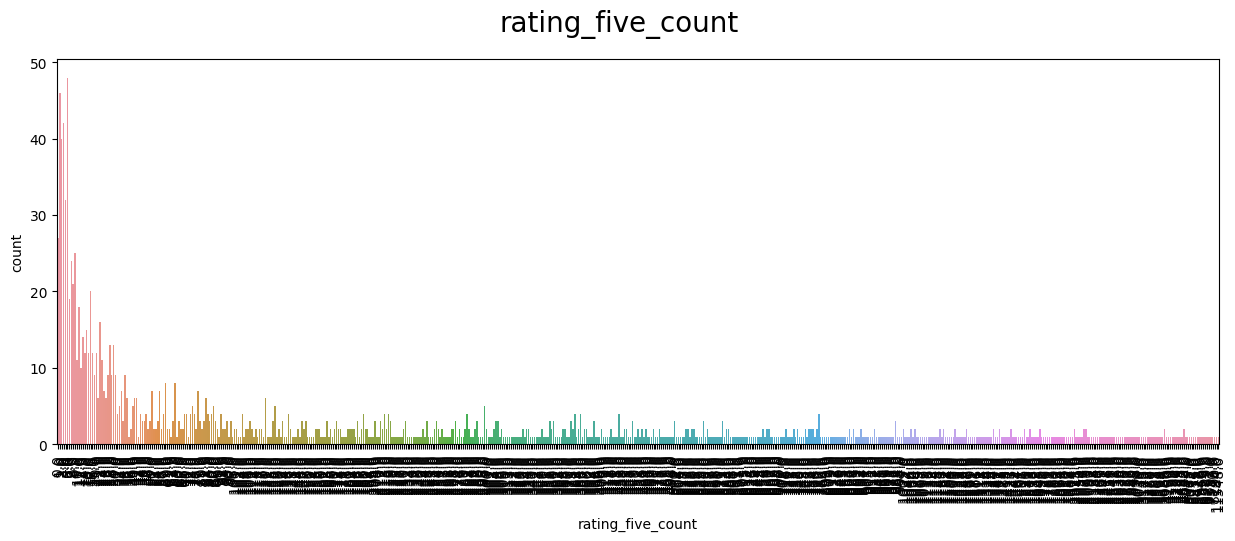

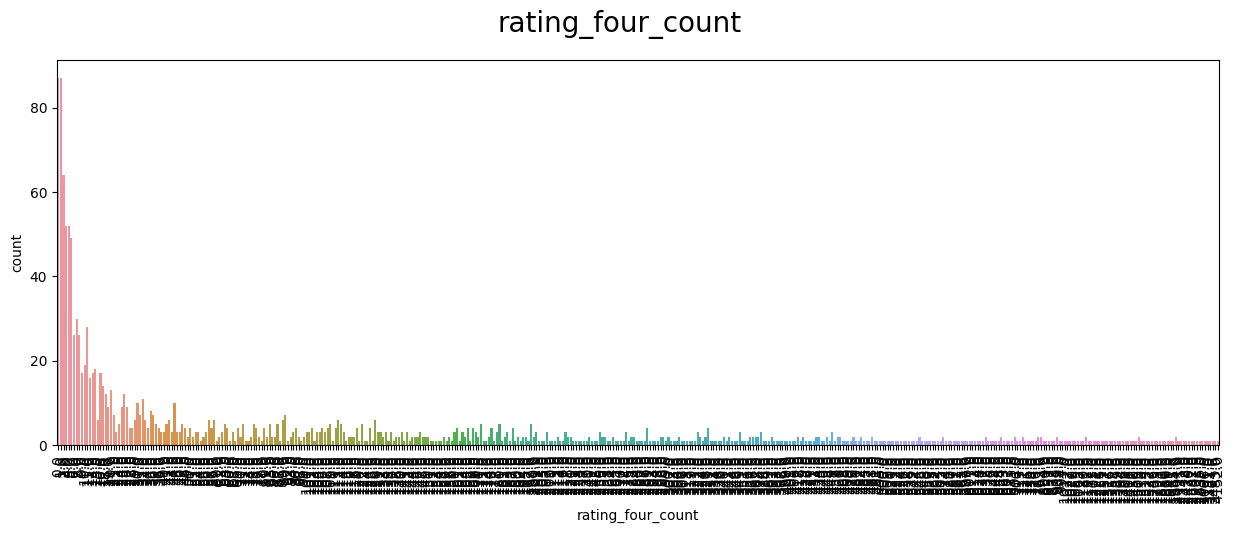

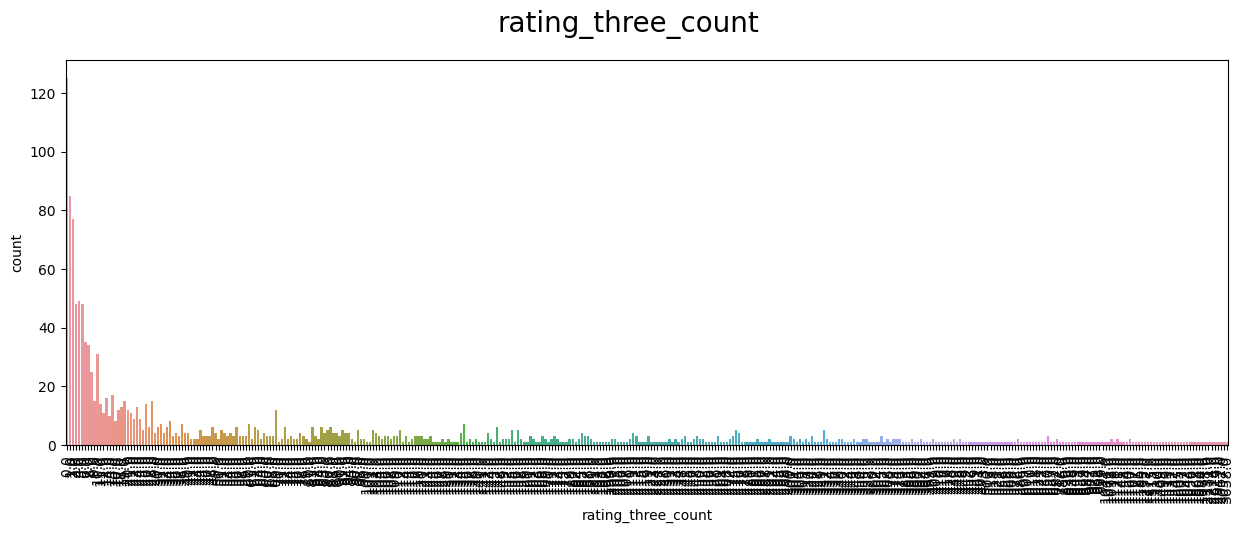

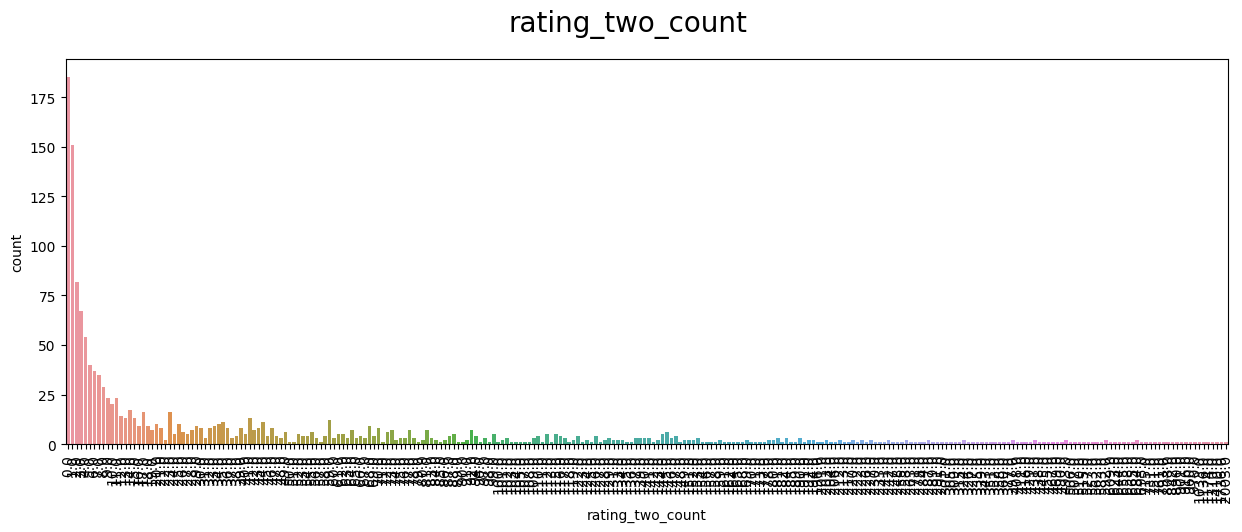

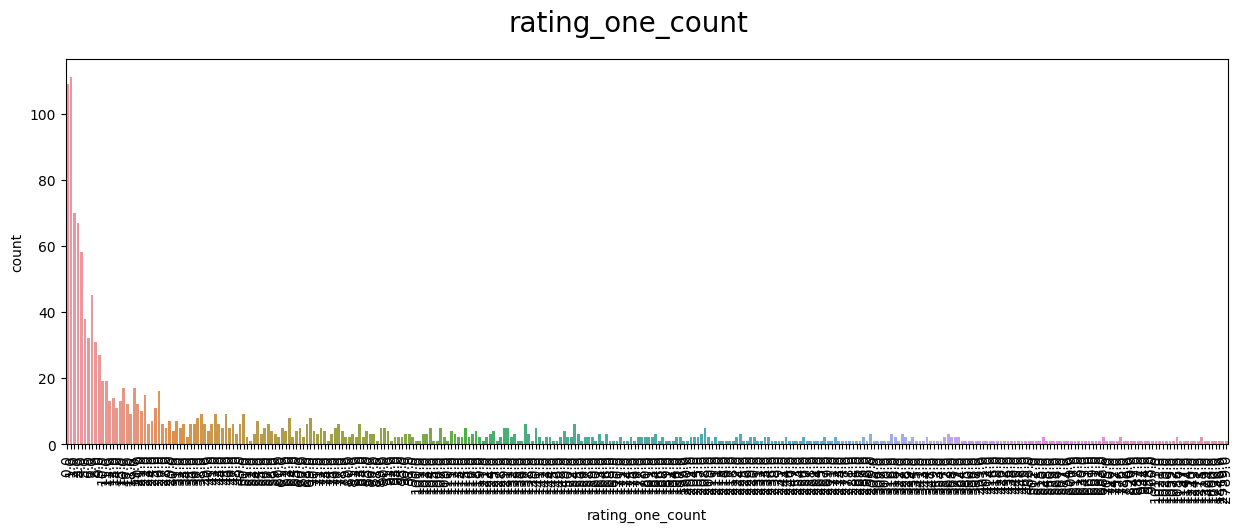

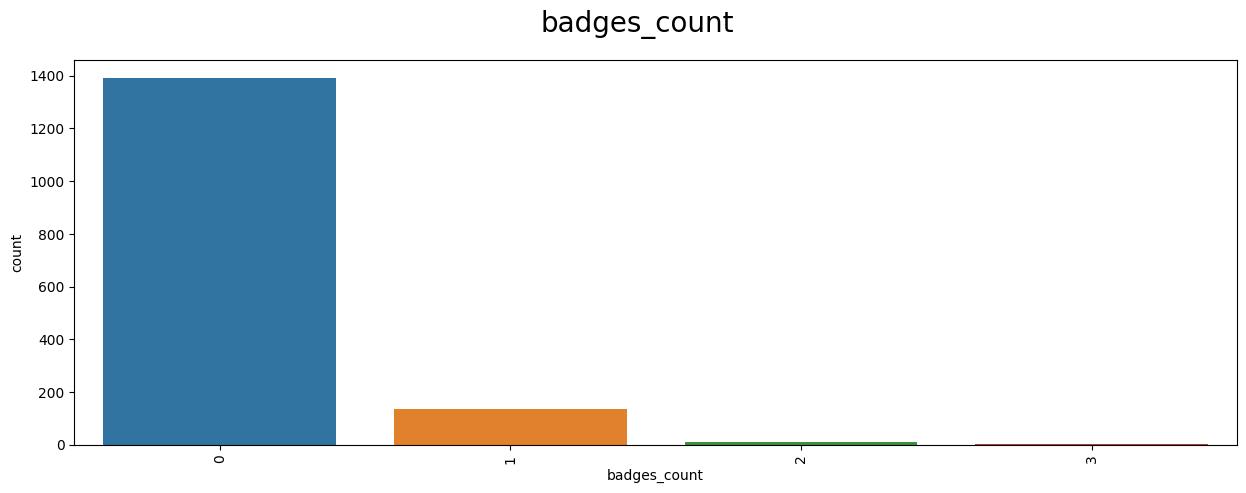

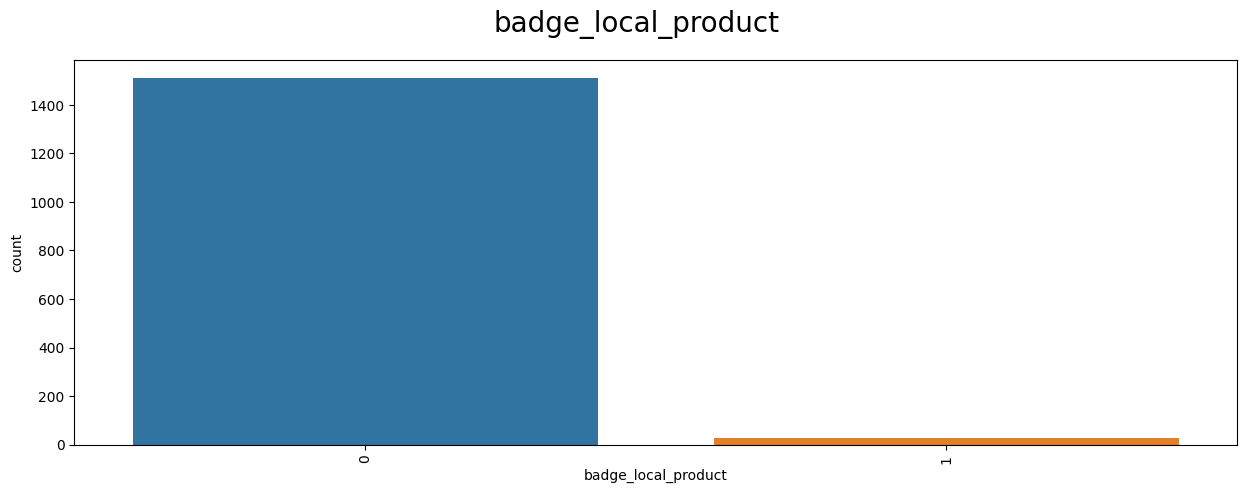

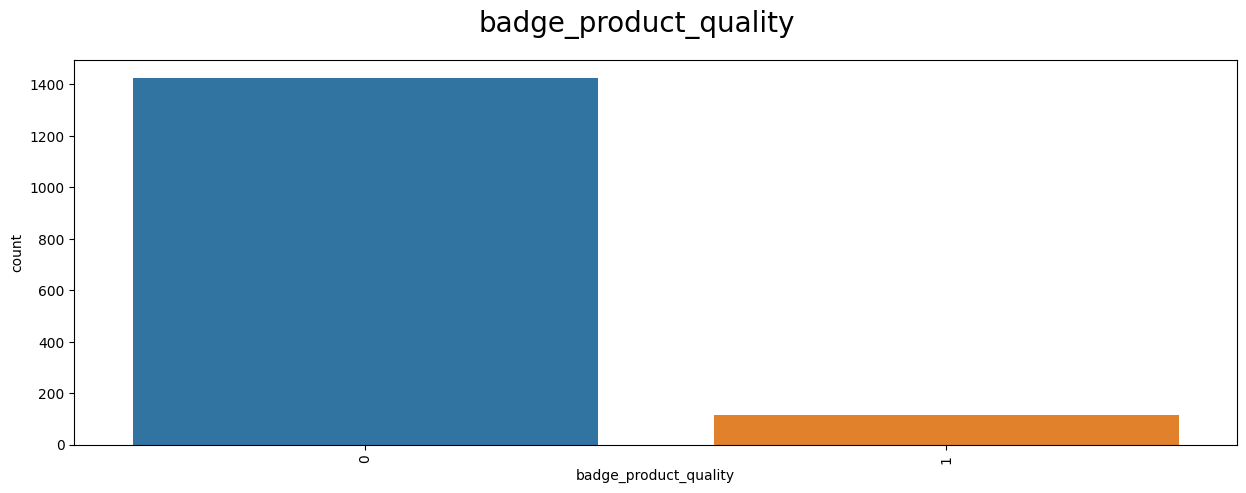

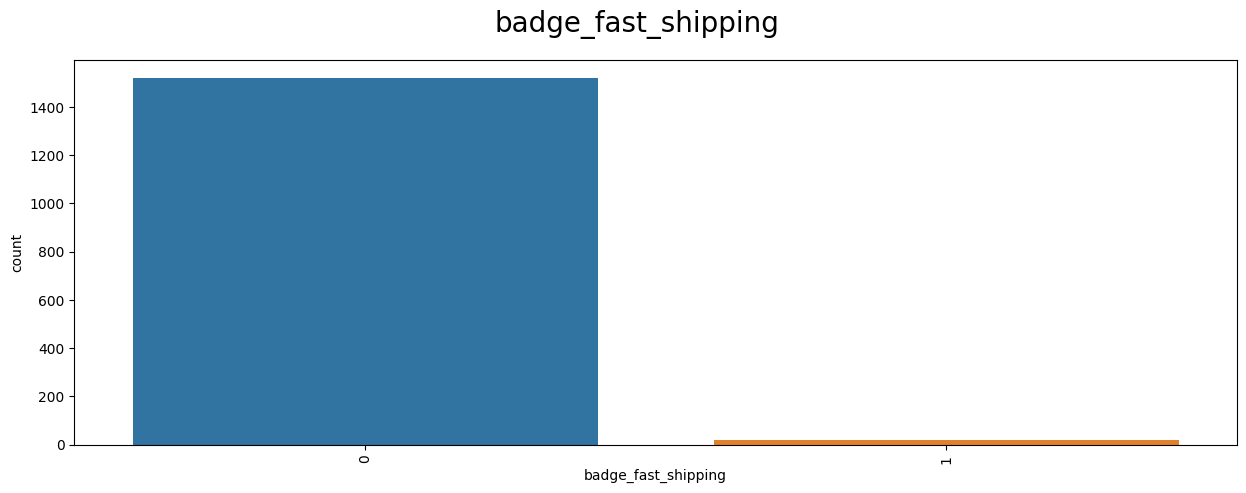

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 28417 (\N{CJK UNIFIED IDEOGRAPH-6F01}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 24107 (\N{CJK UNIFIED IDEOGRAPH-5E2B}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 24125 (\N{CJK UNIFIED IDEOGRAPH-5E3D}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-pa

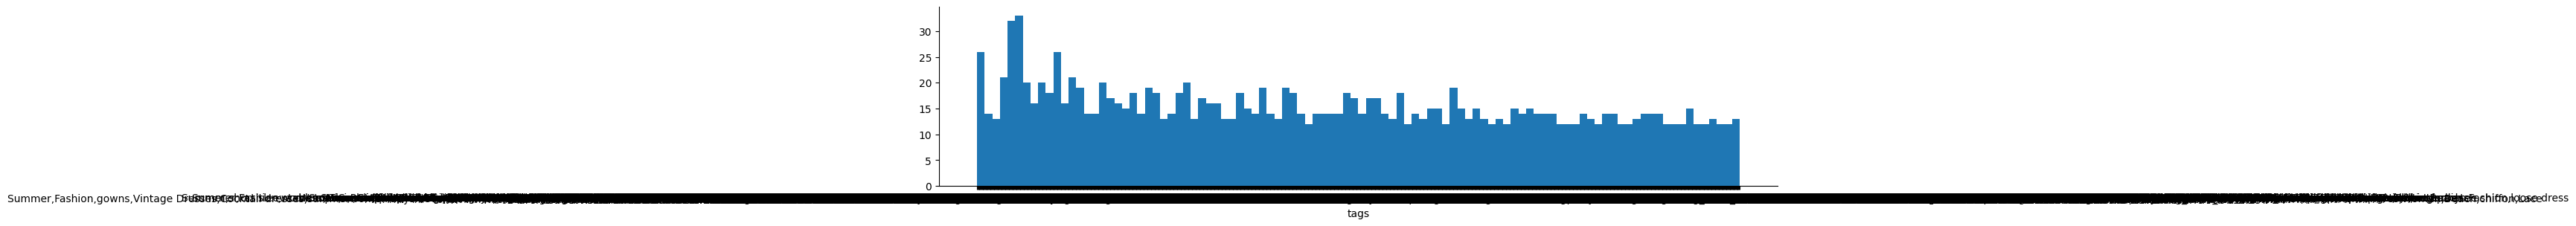

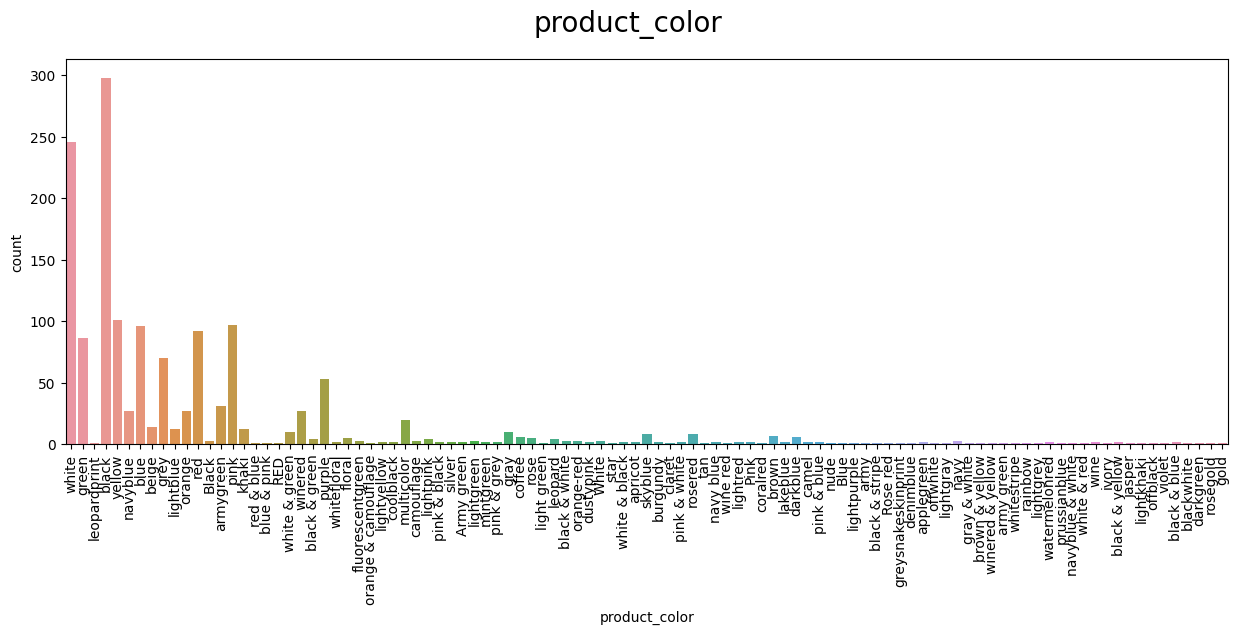

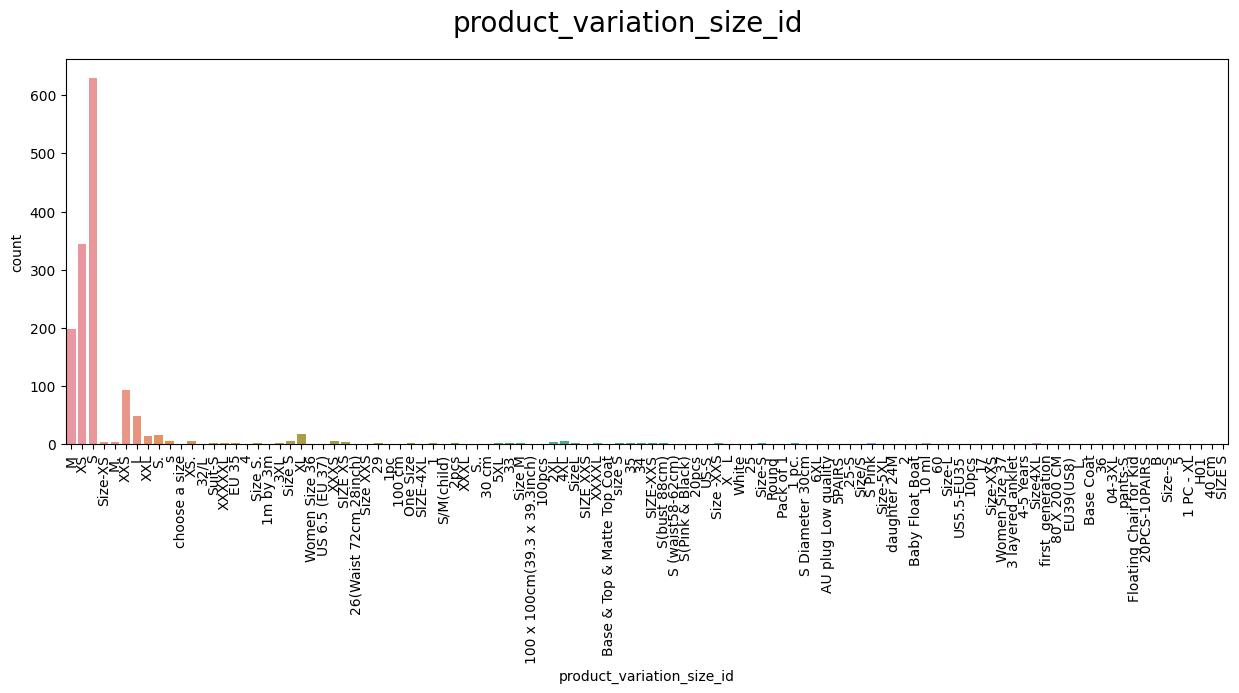

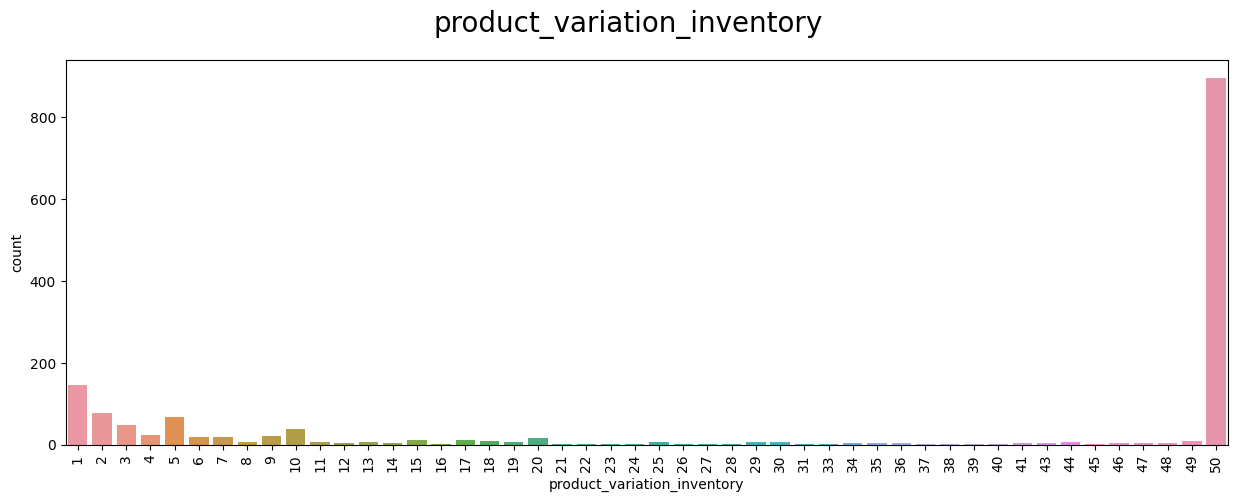

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pac

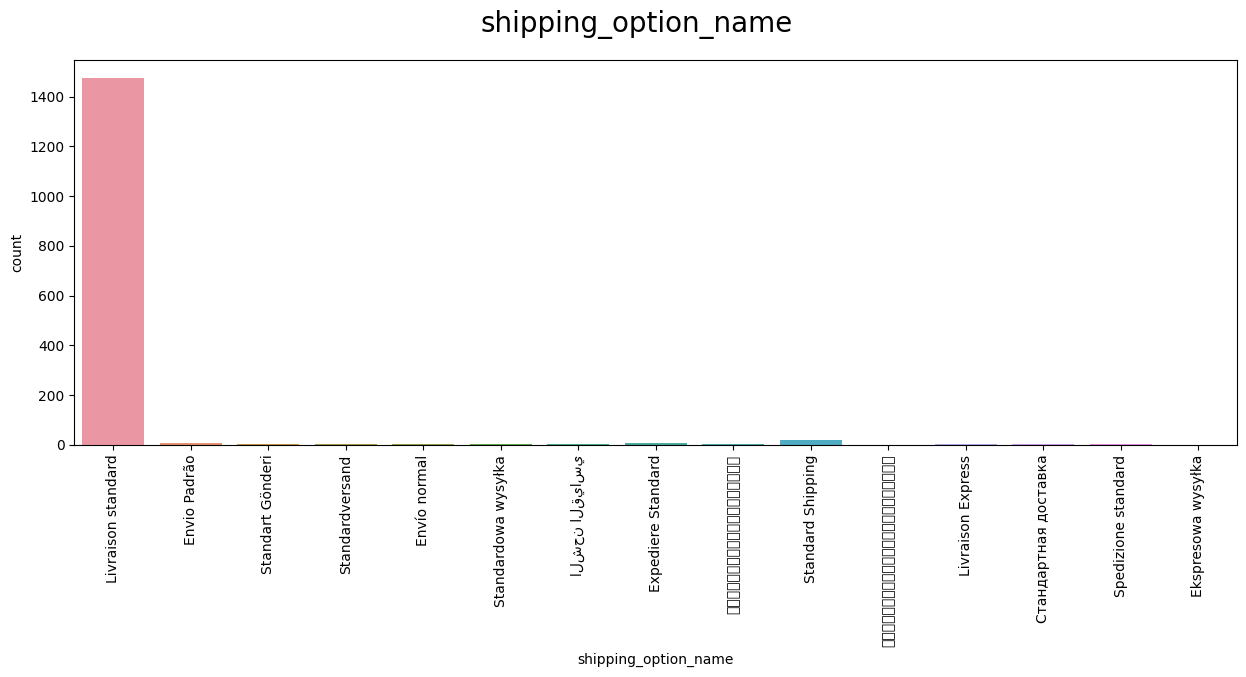

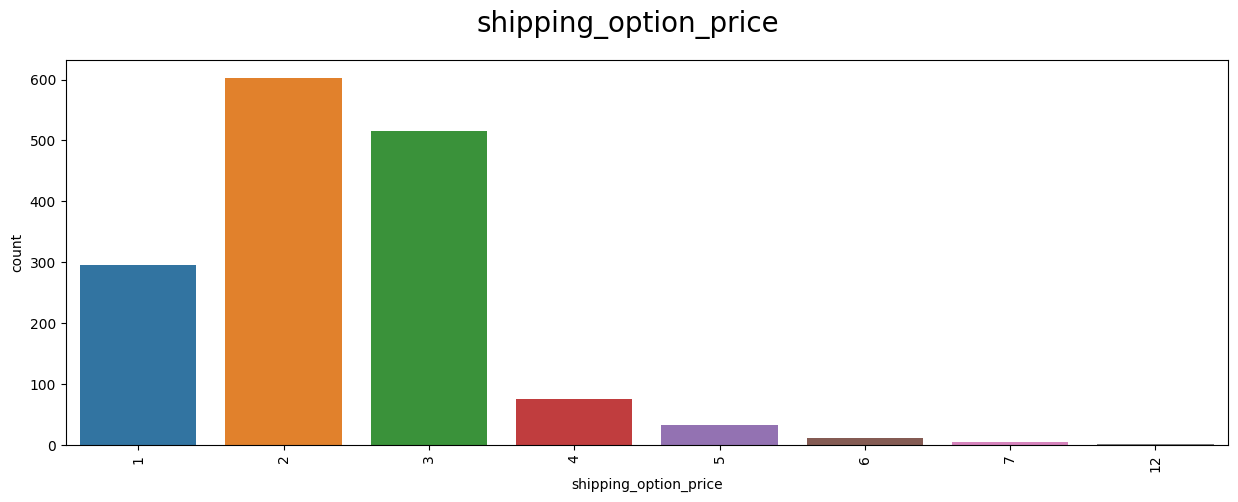

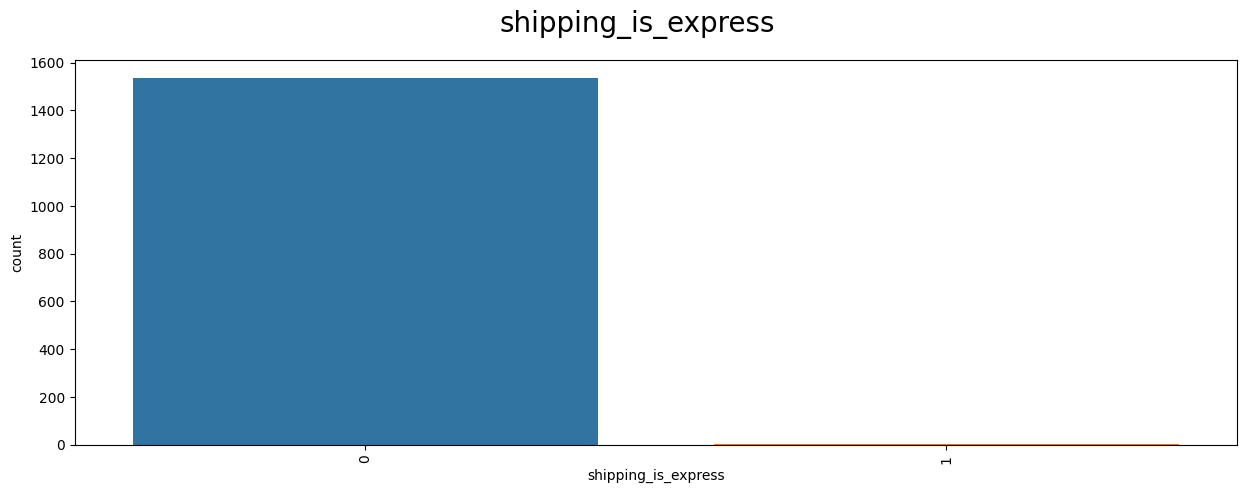

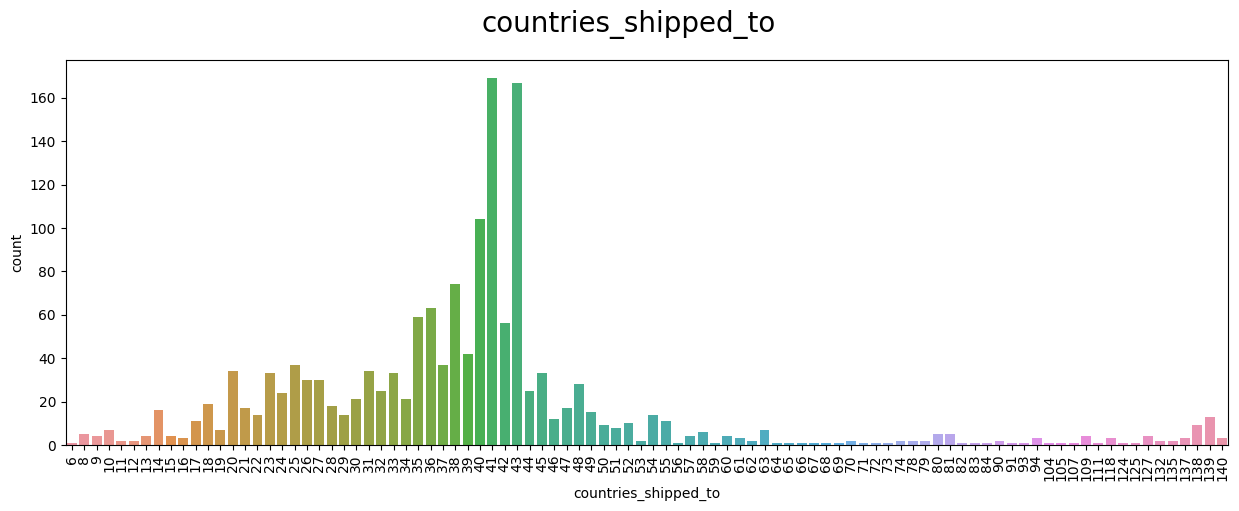

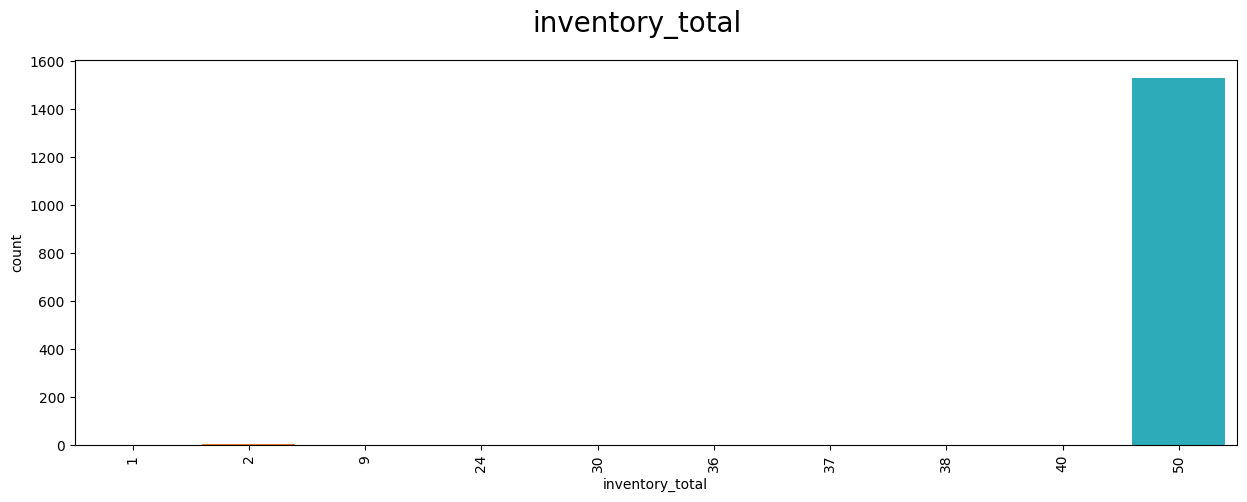

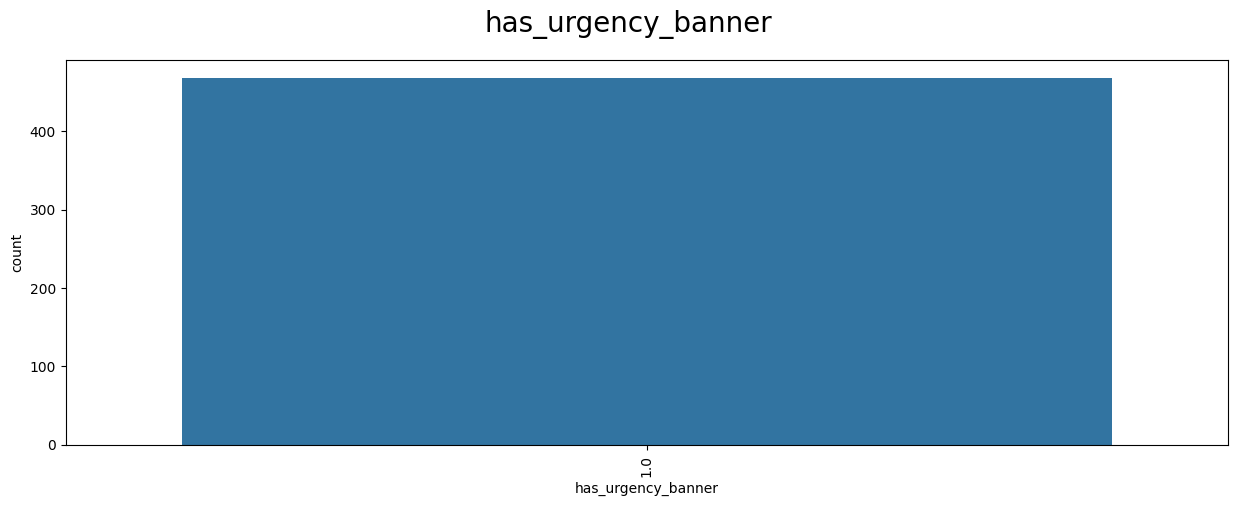

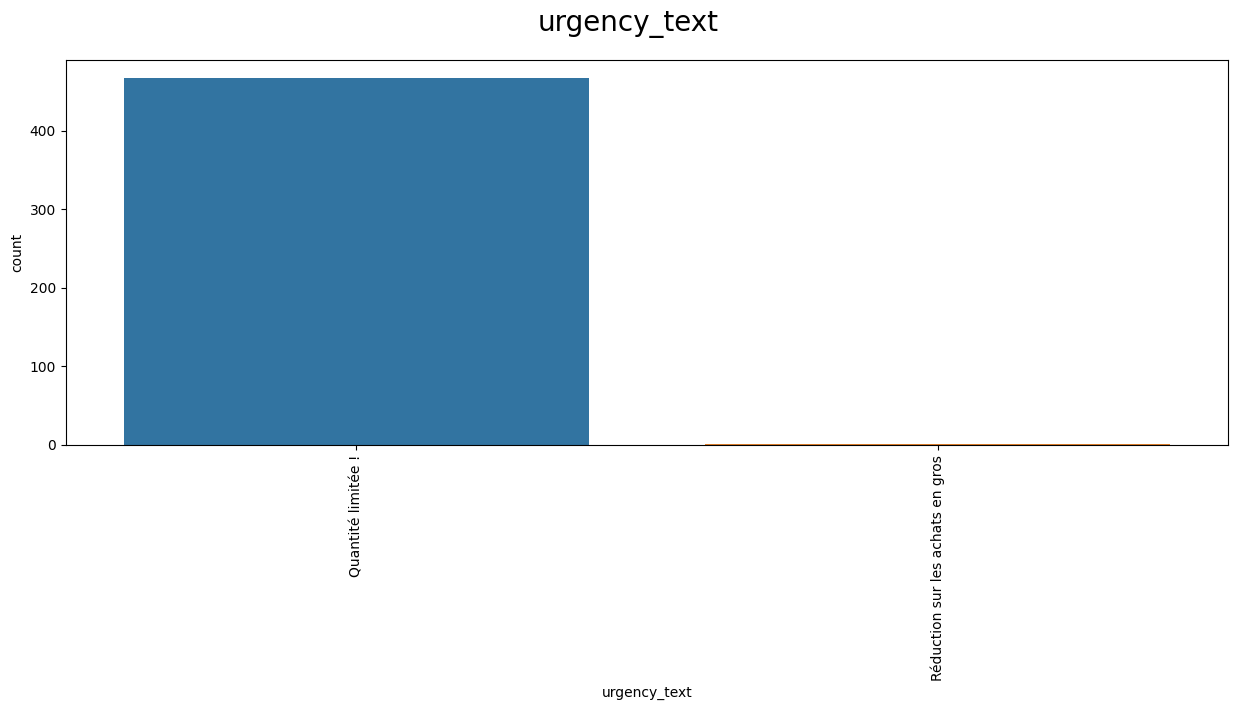

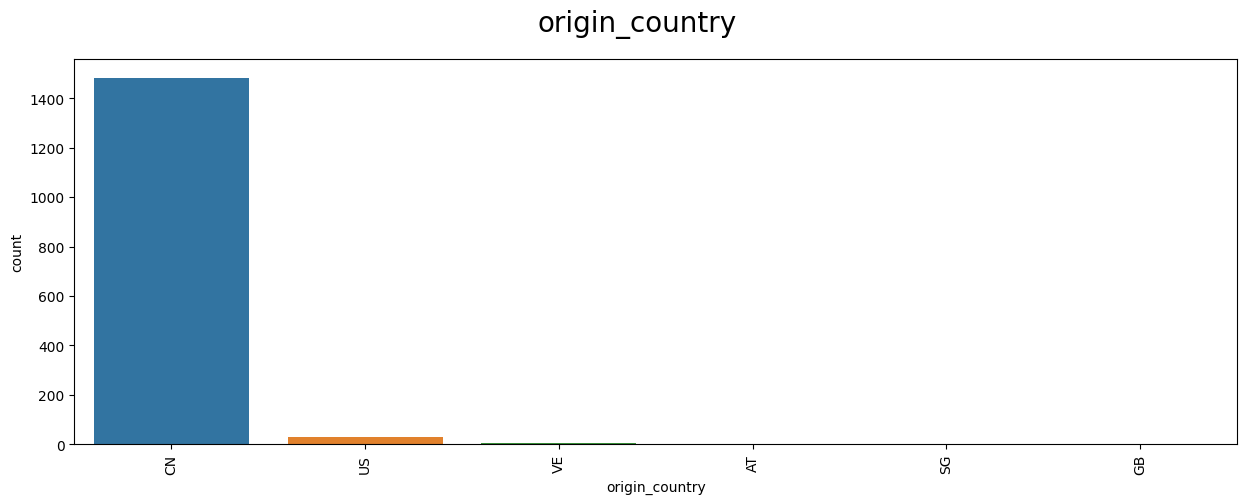

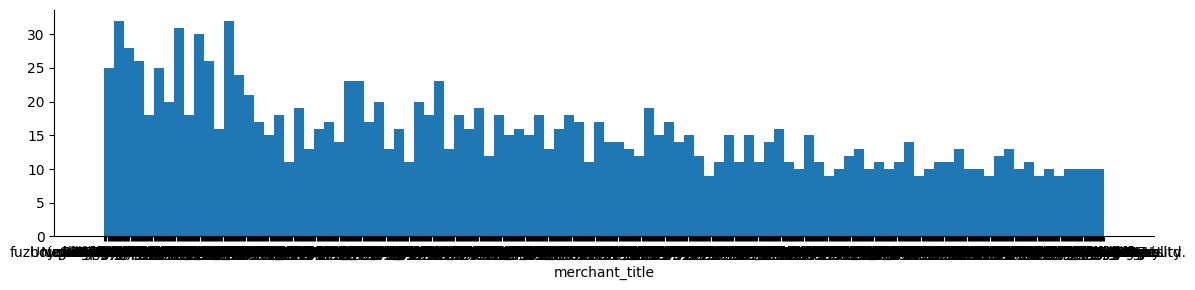

TypeError: ignored

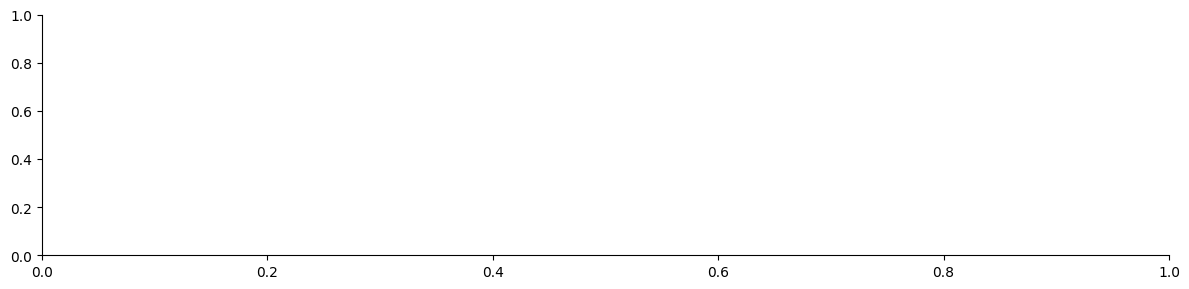

In [6]:
def hist_count(column, data, exclude_col):
    if column not in exclude_col:
            f, axes = plt.subplots(1,1,figsize=(15,5))
            sns.countplot(x=column, data=data)
            plt.xticks(rotation = 90)
            plt.suptitle(column, fontsize=20)
            plt.show()
    else:
            his = sns.FacetGrid(data, margin_titles=True, aspect = 4, height=3)
            his.map(plt.hist,column,bins=100)
            plt.show()
    plt.show()
exclude_col = ['title', 'title_orig', 'currency_buyer', 'tags', 'merchant_title', 'merchant_name','merchant_info_subtitle', 'merchant_id', 'merchant_profile_picture', 'product_url','product_picture', 'product_id', 'theme', 'crawl_month' ]
for column in sp.columns:
    hist_count(column,sp,exclude_col)


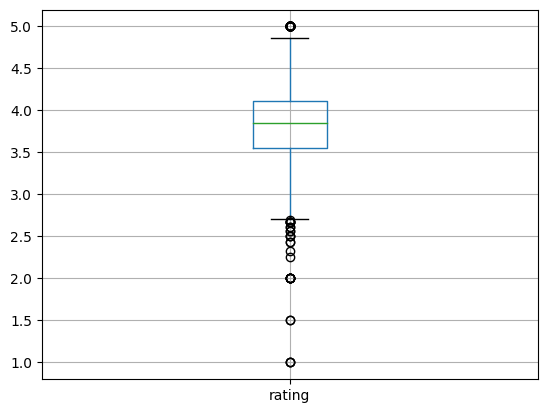

In [7]:
boxplot = sp.boxplot(column=['rating'])
plt.show()
